## Video 2.2 - Solving our problem using HCA - Part 2

### To perform clustering using HCA you will be following these steps:

1. __Load the Dataset:__ Import the pre-processed dataset.

2. __Processing and Feature Selection:__ Choose the features from the dataset that are relevant for the problem statement.

3. __Pre-process the data:__ Use appropriate pre-processing measures for the problem statement.

4. __Apply HCA to generate the dendrogram__

5. __Select the number of clusters using a threshold__

6. __Evaluate and Interpret the Clusters:__ By plotting different features with cluster labels.


In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
data_preprocessed = pd.read_csv('data_preprocessed.csv')

In [3]:
# Define the aggregation operations
aggregation = {
    
    'Page_traffic':'last',
    'Organic Search Rank': 'last',
    'Image_Count': 'last',
    'Bullet_Count': 'last',
    'Title_Count': 'last',
    'Description_Length': 'last',
     '1_Star_Rating': 'last',
     '2_Star_Rating': 'last',
     '3_Star_Rating': 'last',
     '4_Star_Rating': 'last',
     '5_Star_Rating': 'last',  
    'Unit_price':'last',
    'Revenue($)': 'sum',
}

# Group by 'SKU_ID' and aggregate
# data_selected = data_preprocessed.groupby('SKU_ID').agg(aggregation).reset_index()
data_selected = data_preprocessed.groupby('SKU_ID').agg(aggregation)
data_selected

,Page_traffic,Organic Search Rank,Image_Count,Bullet_Count,Title_Count,Description_Length,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Unit_price,Revenue($)
SKU_ID,,,,,,,,,,,,,
SKU1011,3903.0,19.0,5.0,5.0,91.0,59.0,49.0,38.0,81.0,179.0,1227.0,6.612984,1805434
SKU1014,598.0,31.0,0.0,5.0,79.0,99.0,55.0,26.0,64.0,118.0,691.0,20.099526,0
SKU1024,4090.0,37.0,0.0,8.0,163.0,158.0,48.0,34.0,92.0,205.0,1494.0,12.659214,2340227
SKU1025,5760.0,3.0,2.0,6.0,90.0,62.0,33.0,12.0,52.0,122.0,917.0,12.289088,2432316
SKU1036,3088.0,36.0,12.0,8.0,126.0,221.0,140.0,78.0,228.0,474.0,3479.0,18.474910,2839170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SKU968,875.0,19.0,9.0,5.0,85.0,56.0,57.0,39.0,116.0,273.0,1803.0,20.905660,0
SKU978,655.0,33.0,0.0,8.0,167.0,158.0,0.0,0.0,0.0,38.0,172.0,14.686888,2211515
SKU989,583.0,28.0,13.0,6.0,62.0,122.0,162.0,107.0,277.0,571.0,3809.0,20.905660,0


In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Create a DataFrame for the scaled data
data_scaled = pd.DataFrame(data_scaled, columns=data_selected.columns, index = data_selected.index)

# Show the first few rows of the scaled DataFrame
data_scaled.head()


,Page_traffic,Organic Search Rank,Image_Count,Bullet_Count,Title_Count,Description_Length,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Unit_price,Revenue($)
SKU_ID,,,,,,,,,,,,,
SKU1011,0.677839,-0.058121,-0.411446,-1.576290,-0.551930,-1.284448,-0.272962,-0.177348,-0.377795,-0.313058,-0.263131,-1.727217,-0.062109
SKU1014,-1.121082,0.990253,-1.427309,-1.576290,-0.962336,-0.632472,-0.159208,-0.495841,-0.540692,-0.595646,-0.637991,-0.151948,-1.624228
SKU1024,0.779623,1.514440,-1.427309,1.486582,1.910506,0.329194,-0.291921,-0.283512,-0.272391,-0.192611,-0.076401,-1.020999,0.400611
SKU1025,1.688609,-1.455953,-1.020964,-0.555332,-0.586131,-1.235550,-0.576307,-0.867416,-0.655678,-0.577116,-0.479935,-1.064231,0.480290
SKU1036,0.234232,1.427076,1.010763,1.486582,0.645087,1.356056,1.452308,0.884296,1.030787,1.053556,1.311841,-0.341708,0.832313


#### RUN ALL THE CELLS ABOVE TILL HERE TO COMPLETE THE FIRST 3 STEPS

### Step 4: Apply HCA to the dataset

In [5]:
import scipy.cluster.hierarchy as sch
links = sch.linkage(data_scaled, method='ward')
links

array([[153.        , 155.        ,   0.53697889,   2.        ],
       [ 10.        ,  98.        ,   0.53706317,   2.        ],
       [113.        , 123.        ,   0.57111797,   2.        ],
       [137.        , 228.        ,   0.65310787,   2.        ],
       [ 72.        , 141.        ,   0.7745152 ,   2.        ],
       [ 13.        , 234.        ,   0.78219289,   2.        ],
       [106.        , 140.        ,   0.82753565,   2.        ],
       [ 68.        , 152.        ,   0.8618156 ,   2.        ],
       [ 48.        ,  78.        ,   0.90418194,   2.        ],
       [ 45.        , 121.        ,   0.96699498,   2.        ],
       [176.        , 188.        ,   0.96896225,   2.        ],
       [103.        , 212.        ,   0.97559779,   2.        ],
       [135.        , 157.        ,   1.02991368,   2.        ],
       [ 54.        , 196.        ,   1.03053501,   2.        ],
       [ 47.        ,  51.        ,   1.05739028,   2.        ],
       [ 91.        , 133

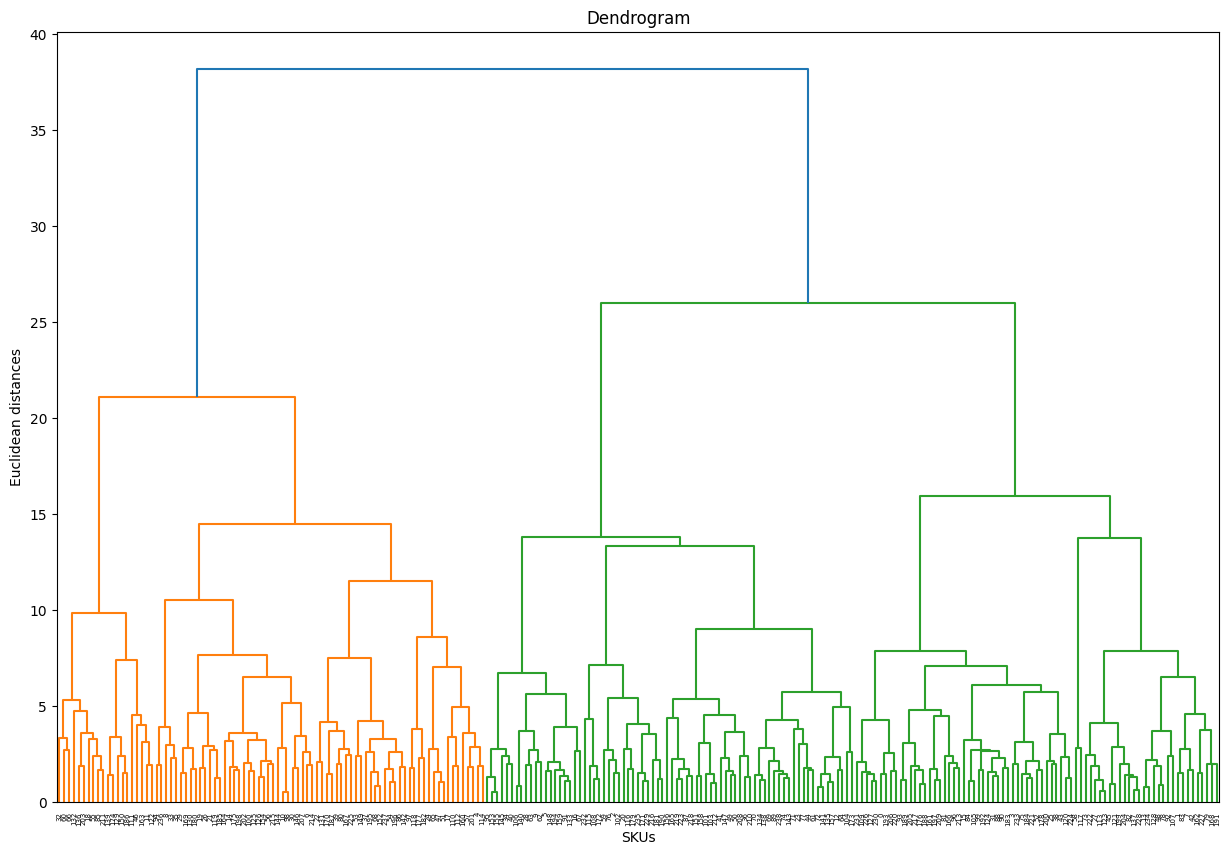

In [6]:
import matplotlib.pyplot as plt
# Generate a dendrogram
plt.figure(figsize=(15, 10))


dendrogram = sch.dendrogram(links)
plt.title('Dendrogram')
plt.xlabel('SKUs')
plt.ylabel('Euclidean distances')
plt.show()

## Step 5: Select the number of clusters using a threshold. 

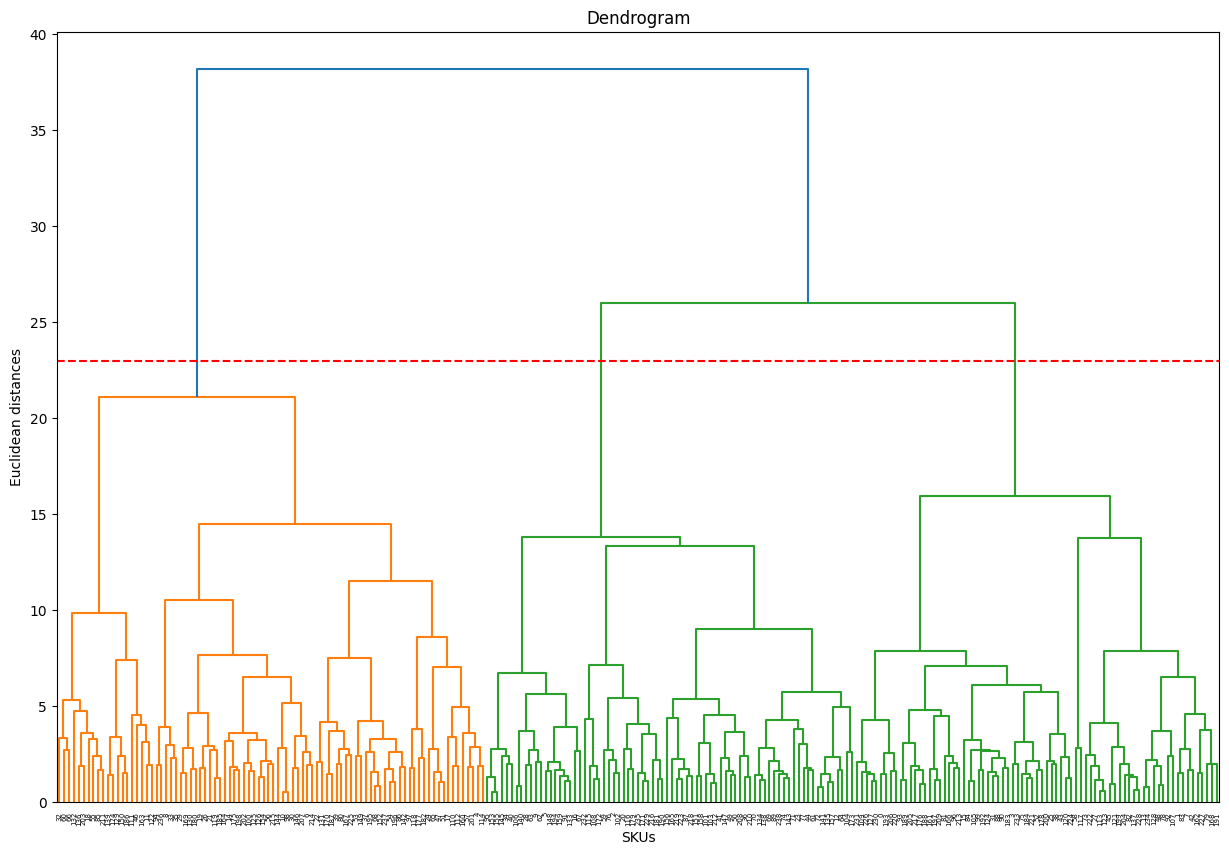

In [7]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrogram")  
plt.title('Dendrogram')
plt.xlabel('SKUs')
plt.ylabel('Euclidean distances')
dend = sch.dendrogram(links)
plt.axhline(y=23, color='r', linestyle='--')

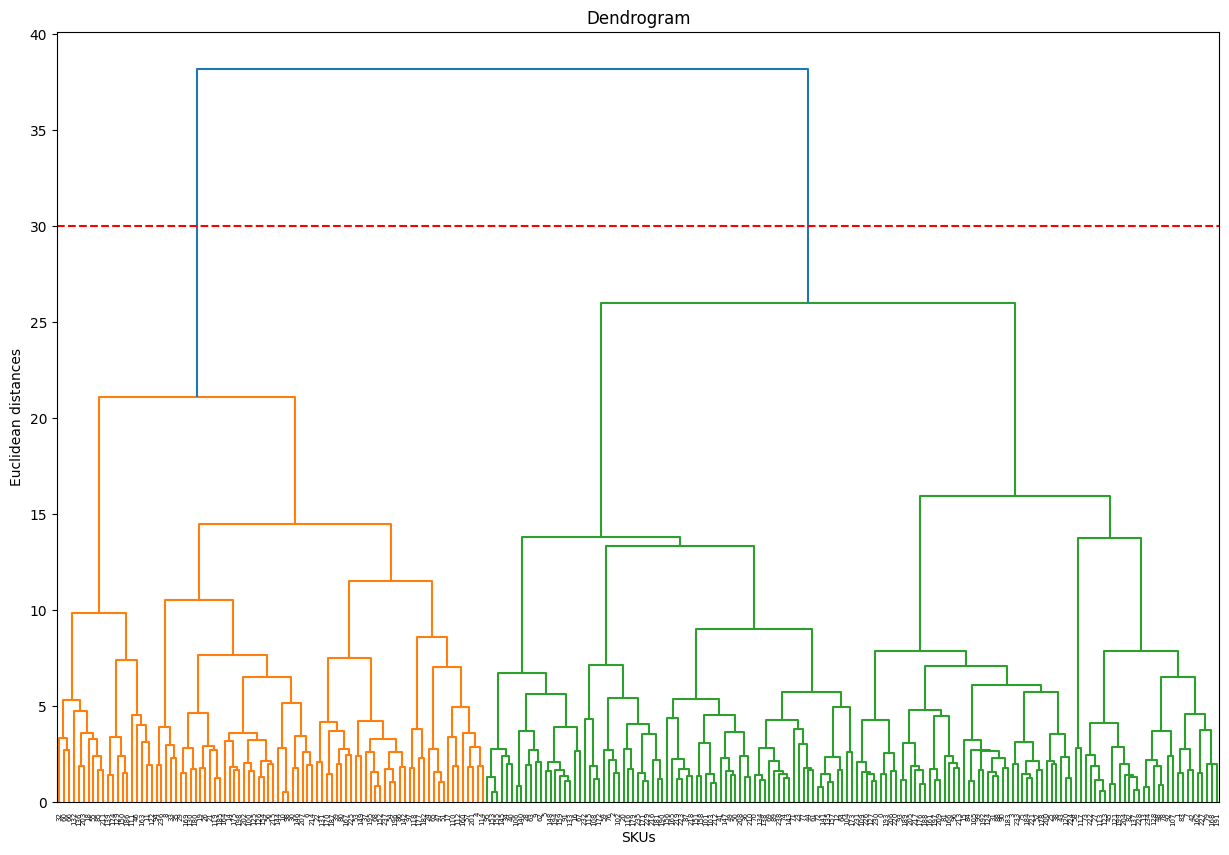

In [8]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrogram")  
plt.title('Dendrogram')
plt.xlabel('SKUs')
plt.ylabel('Euclidean distances')
dend = sch.dendrogram(links)
plt.axhline(y=30, color='r', linestyle='--')

## Step 6: Evaluate and Interpret the Clusters

In [9]:
from scipy.cluster.hierarchy import fcluster
cluster_labels = fcluster(links, t=30, criterion='distance')

# Add the cluster labels to your dataframe
data_scaled['Cluster_Labels'] = cluster_labels
data_scaled

,Page_traffic,Organic Search Rank,Image_Count,Bullet_Count,Title_Count,Description_Length,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Unit_price,Revenue($),Cluster_Labels
SKU_ID,,,,,,,,,,,,,,
SKU1011,0.677839,-0.058121,-0.411446,-1.576290,-0.551930,-1.284448,-0.272962,-0.177348,-0.377795,-0.313058,-0.263131,-1.727217,-0.062109,2
SKU1014,-1.121082,0.990253,-1.427309,-1.576290,-0.962336,-0.632472,-0.159208,-0.495841,-0.540692,-0.595646,-0.637991,-0.151948,-1.624228,2
SKU1024,0.779623,1.514440,-1.427309,1.486582,1.910506,0.329194,-0.291921,-0.283512,-0.272391,-0.192611,-0.076401,-1.020999,0.400611,2
SKU1025,1.688609,-1.455953,-1.020964,-0.555332,-0.586131,-1.235550,-0.576307,-0.867416,-0.655678,-0.577116,-0.479935,-1.064231,0.480290,2
SKU1036,0.234232,1.427076,1.010763,1.486582,0.645087,1.356056,1.452308,0.884296,1.030787,1.053556,1.311841,-0.341708,0.832313,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SKU968,-0.970311,-0.058121,0.401245,-1.576290,-0.757133,-1.333346,-0.121290,-0.150807,-0.042418,0.122405,0.139703,-0.057789,-1.624228,2
SKU978,-1.090057,1.164982,-1.427309,1.486582,2.047308,0.329194,-1.201954,-1.185909,-1.153952,-0.966254,-1.000962,-0.784161,0.289246,2
SKU989,-1.129247,0.728159,1.213936,-0.555332,-1.543745,-0.257585,1.869407,1.653987,1.500315,1.502917,1.542631,-0.057789,-1.624228,1
